# Comparando datos con una PDF

In [6]:
%matplotlib notebook

In [13]:
#pip install boost-histogram

In [14]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import boost_histogram as bh

Generador de números aleatorios

In [15]:
rng = np.random.default_rng()

Número de eventos en el histograma

In [16]:
numero_eventos = 1000

In [17]:
x = rng.normal(size=numero_eventos)

In [31]:
np.random.default_rng?

Histograma de frecuencia

In [22]:
xmin, xmax = -5, 5
nbins = 20
hist = bh.Histogram(bh.axis.Regular(bins=nbins, start=xmin, stop=xmax))

In [24]:
hist.fill(x)

Histogram(Regular(20, -5, 5), storage=Double()) # Sum: 1000.0

<IPython.core.display.Javascript object>


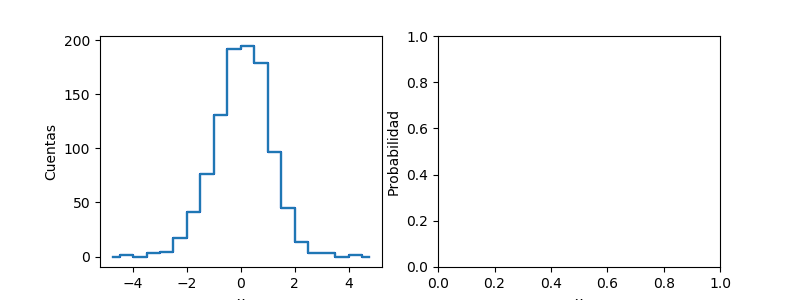

Text(0, 0.5, 'Probabilidad')

In [25]:
fig = plt.figure(figsize=(8,3))
ax1, ax2 = fig.subplots(1,2)
ax1.set_xlabel('x')
ax1.set_ylabel('Cuentas')
ax2.set_xlabel('x')
ax2.set_ylabel('Probabilidad')

Histograma de frecuencias

In [29]:
xbin = hist.axes.centers[0]
ax1.plot(xbin, hist.values(), drawstyle='steps-mid', color='tab:blue', label='Datos')

Función de densidad de probabilidad

In [11]:
x = np.linspace(xmin, xmax, 256)
ax2.plot(x, norm.pdf(x), color='tab:orange', label='PDF')

Factor de escala

In [12]:
bin_width = hist.axes[0].widths[0]
factor_escala = numero_eventos * bin_width
print("Factor de escala: ", factor_escala)

Factor de escala:  500.0


PDF escaleada

In [13]:
ax1.plot(x, norm.pdf(x)*factor_escala, color='tab:orange', label='$\mu_i$')

Datos escaleados

In [14]:
ax2.plot(xbin, hist.values()/factor_escala, drawstyle='steps-mid', color='tab:blue', label='$y_i$')

In [15]:
ax1.legend()
ax2.legend()

In [ ]:
# plt.savefig('histo_densidad.svg')